# Usiminas: Residência em Ciência de Dados

**Disciplina:** Probabilidade e Análise de Dados com Python

**Professores:** Flávio Figueiredo e Pedro Melo

**Aula 8:** Probabilidade

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

## Questão 1 -  Calculando probabilidades e probabilidades condicionais


|$$\,\,\,x\,\,\,$$ | $$\,\,\,y\,\,\,$$ | $$\mathbb{P}(X,Y)$$|
|:----------------:|:-----------------:|:------------------:|
|        0         |         0         |         0.050      |
|        0         |         1         |         0.025      |
|        0         |         2         |         0.075      |
|        0         |         3         |         0.100      |
|        1         |         0         |         0.130      |
|        1         |         1         |         0.090      |
|        1         |         2         |         0.150      |
|        1         |         3         |         0.022      |
|        2         |         0         |         0.030      |
|        2         |         1         |         0.046      |
|        2         |         2         |         0.110      |
|        2         |         3         |         0.015      |
|        3         |         0         |         0.010      |
|        3         |         1         |         0.094      |
|        3         |         2         |         0.005      |
|        3         |         3         |         0.048      |

Considere o conjunto de dados acima para responder às seguintes perguntas. Na célula a seguir, construímos o dataframe `dados` com as mesmas informações da tabela mostrada.

In [59]:
dados = pd.DataFrame({'x':np.array([[0]*4,[1]*4,[2]*4,[3]*4]).flatten(), 
                      'y':list(range(4))*4,
                      'P(X,Y)':[0.05, 0.025, 0.075, 0.1, 0.13, 0.09, 0.15, 0.022, 0.03, 0.046, 0.11, 0.015, 0.010, 0.094, 0.005, 0.048]
                     })
dados

,x,y,"P(X,Y)"
0,0,0,0.050
1,0,1,0.025
2,0,2,0.075
3,0,3,0.100
4,1,0,0.130
5,1,1,0.090
6,1,2,0.150
7,1,3,0.022
8,2,0,0.030
9,2,1,0.046


#### a) Crie uma função para calcular a distribuição de probabilidades de uma das variáveis do conjunto de dados mostrado acima. Teste sua função para a variável x.

A função deve se chamar `distribuicao`, retornar uma lista contendo as probabilidades e receber os parâmetros:
> * **v** = _string_ representando o nome da coluna da variável que se deseja calcular as probabilidades
> * **p** = _string_ representando o nome da coluna das probabilidades
> * **df** = dataframe contendo o conjunto de dados

In [65]:
def distribuicao(v, p, df):
    # v = string representando o nome da coluna da variável que se deseja calcular as probabilidades 
    # p = string representando o nome da coluna das probabilidades
    # df = dataframe contendo o conjunto de dados

    prob = df.groupby(v)[p].sum()
    
    return prob.values

# CHAMAR FUNÇÃO
distribuicao("x", "P(X,Y)", dados)

array([0.25 , 0.392, 0.201, 0.157])

#### b) Crie uma função para calcular a distribuição de probabilidade condicional $\mathbb{P}(Y \,|\, X=x)$. Teste sua função para x = 1.

In [68]:
def condicional(v1, v2, b, p, df):
    # v1 = string representando o nome da coluna da variável que se deseja calcular as probabilidades 
    # v2 = string representando o nome da coluna da variável cujo valor será fixado
    # b = valor fixo da variável v2
    # p = string representando o nome da coluna das probabilidades
    # df = dataframe contendo o conjunto de dados
    
    p_v2 = distribuicao(v2, p, df)[b]

    prob_cond = df.query(f"{v2} == {b}")[p] / p_v2

    return prob_cond.values

# CHAMAR FUNÇÃO
condicional("y", "x", 1, "P(X,Y)", dados)

array([0.33163265, 0.22959184, 0.38265306, 0.05612245])

#### c) Crie uma função que retorne a probabilidade de uma das variáveis ser maior que um valor passado como parâmetro. Teste sua função para o caso $\mathbb{P}(X>1)$.

In [76]:
def probabilidade_maior_que(v, a, p, df):
    # v = string representando o nome da coluna da variável que se deseja calcular as probabilidades 
    # a = valor ao qual a variável v deve ser superior
    # p = string representando o nome da coluna das probabilidades
    # df = dataframe contendo o conjunto de dados

    p_v = distribuicao(v, p, df)
    
    return p_v[a+1:].sum()

# CHAMAR FUNÇÃO
probabilidade_maior_que("x", 1, "P(X,Y)", dados)

0.358

## Questão 2 - (In)Dependência de variáveis aleatórias

Como vimos na aula, dizemos que dois eventos $E$ e $F$ são independentes se a probabilidade de ambos acontecerem é o produto das probabilidades que cada um acontece:

$$P(E,F) = P(E)P(F)$$

#### a) Considerando o conjunto de dados da questão anterior, crie uma fórmula que retorne `True` caso as variáveis x e y sejam dependentes ou `False` caso contrário.

In [159]:
def dependentes(v1, v2, p, df):
    # v1 = string representando o nome da coluna da primeira variável que se deseja verificar (in)dependência
    # v2 = string representando o nome da coluna da segunda variável que se deseja verificar (in)dependência
    # p = string representando o nome da coluna das probabilidades
    # df = dataframe contendo o conjunto de dados
    pv1 = distribuicao(v1, p, df)[np.newaxis]
    pv2 = distribuicao(v2, p, df)[np.newaxis]

    prob = np.dot(np.transpose(pv1), pv2).flatten()

    grouped = df.groupby([v1, v2]).sum()
    
    # COMPLETAR FUNÇÃO
    return not all(prob == grouped[p])

# CHAMAR FUNÇÃO
dependentes("x", "y", "P(X,Y)", dados)

True

#### b) Utilizando sua função, verifique se os pares de variáveis (x,y), (y,z) e (x,z) são independentes no conjunto de dados `d2`. Se necessário, realize alterações em sua função.

In [160]:
d2 = pd.read_csv('https://raw.githubusercontent.com/fccarvalho2/Viz/main/Q2.csv',index_col=0)

dependentes("x", "y", "P(X,Y,Z)", d2)

True

In [161]:
dependentes("y", "z", "P(X,Y,Z)", d2)

True

In [162]:
dependentes("x", "z", "P(X,Y,Z)", d2)

True

## Questão 3 - Simulação de variáveis aleatórias

Como vimos em aula, podemos criar funções que nos auxiliam a simular dados de uma distribuição. Entretanto, várias destas funções já estão implementadas na biblioteca `scipy`, o que nos permite gerar dados que seguem uma distribuição de probabilidades de interesse. Utilizando esta biblioteca, simule 1000 amostras das seguintes variáveis:

#### a) N, que segue a distribuição de poisson (discreta), com média $\mu = 2.5$. Em seguida, gere um histograma com estes resultados e plote a função de densidade acumulada.

In [123]:
from scipy.stats import poisson

N = 1000
mean = 2.5

data = poisson.rvs(mu=mean, size=N)

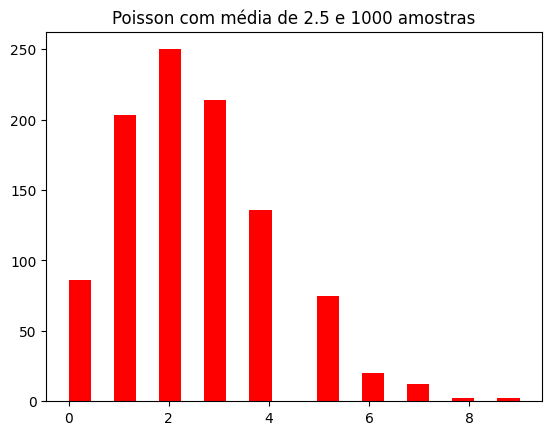

In [132]:
plt.hist(data, bins=20, color='r')
plt.title("Poisson com média de 2.5 e 1000 amostras")
plt.show()

#### b) G, que segue a distribuição log gamma (contínua), com 4 graus de liberdade. Em seguida, gere um histograma com estes resultados e plote a função de densidade acumulada.

In [136]:
from scipy.stats import loggamma

data = loggamma.rvs(c=4, size=1000)

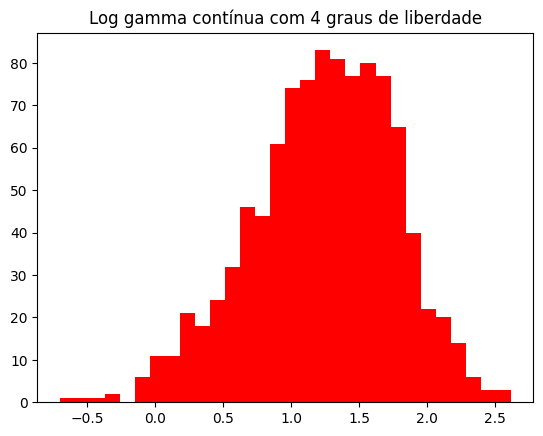

In [139]:
plt.hist(data, bins=30, color='r')
plt.title("Log gamma contínua com 4 graus de liberdade")
plt.show()

## Desafio - Aplicação dos conhecimentos a dados reais

Sabemos que vários fatores relacionados ao estilo de vida de cada um podem ter um grande impacto no risco de doenças cardiovasculares ou infarto. Para este exercício, utilizaremos um banco de dados público dos Centros para Controles de Doenças dos Estados Unidos (CDC), que realizou pesquisa em 2015 a respeito dos hábitos de vida de 253.680 americanos. Este conjunto de dados possui 22 colunas com dados numéricos, em sua maioria categóricos binários (0 para não e 1 para sim). 

Desejamos utilizar nossos conhecimentos adquiridos até aqui para responder às seguintes perguntas:

In [140]:
heart = pd.read_csv('https://raw.githubusercontent.com/fccarvalho2/Viz/main/heart_disease_kaggle.csv')
heart.head(20)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,1.0,1.0,1.0,1.0,30.0,1.0,0.0,2.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


**a)** Qual a probabilidade de um entrevistado ter sofrido ataque cardíaco ou possuir doença cardiaca (HeartDiseaseorAttack = 1)?


In [143]:
heart["HeartDiseaseorAttack"].value_counts(normalize=True)

HeartDiseaseorAttack
0.0    0.905814
1.0    0.094186
Name: proportion, dtype: float64

**b)** Qual a probabilidade de um fumante (smoker = 1) ter sofrido ataque cardíaco ou possuir doença cardíaca? E qual a probabilidade para um não fumante?


In [154]:
heart.groupby(["Smoker", "HeartDiseaseorAttack"])["HeartDiseaseorAttack"].count() / heart.groupby("Smoker")["HeartDiseaseorAttack"].count()

Smoker  HeartDiseaseorAttack
0.0     0.0                     0.935635
        1.0                     0.064365
1.0     0.0                     0.868345
        1.0                     0.131655
Name: HeartDiseaseorAttack, dtype: float64

**c)** Qual a probabilidade de um entrevistado que não faz atividade física e não come frutas regularmente (PhysActivity = 0 e Fruits = 0, respectivamente) ser cardíaco?


In [155]:
heart.groupby(["PhysActivity", "Fruits", "HeartDiseaseorAttack"])["HeartDiseaseorAttack"].count() / heart.groupby(["PhysActivity", "Fruits"])["HeartDiseaseorAttack"].count()

PhysActivity  Fruits  HeartDiseaseorAttack
0.0           0.0     0.0                     0.863337
                      1.0                     0.136663
              1.0     0.0                     0.858518
                      1.0                     0.141482
1.0           0.0     0.0                     0.914923
                      1.0                     0.085077
              1.0     0.0                     0.922879
                      1.0                     0.077121
Name: HeartDiseaseorAttack, dtype: float64

**d)** Qual a probabilidade de um entrevistado com obesidade (BMI $\geq$ 30.0) ser cardíaco?


In [167]:
heart.query("BMI >= 30.0").groupby("HeartDiseaseorAttack")["BMI"].count() / heart.query("BMI >= 30.0").shape[0]

HeartDiseaseorAttack
0.0    0.884703
1.0    0.115297
Name: BMI, dtype: float64

**e)** Com base nos resultados anteriores, qual dos fatores de risco analisados mais contribui para risco de desenvolver doenças cardíacas ou infarto?

In [168]:
# O fator de risco mais associado é não comer frutas e não praticar atividades físicas, com uma probabilidade de 0.136663 